[View in Colaboratory](https://colab.research.google.com/github/frunkad/hackerearth-ml6/blob/master/hackerearth_ml6.ipynb)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
alltrain = pd.read_csv("Dataset/train.csv")
building_ownership = pd.read_csv("Dataset/Building_Ownership_Use.csv")
building_structure = pd.read_csv("Dataset/Building_Structure.csv")
alltest = pd.read_csv("Dataset/test.csv")

In [0]:
X = pd.merge(pd.merge(alltrain,building_ownership,on="building_id"),building_structure,on="building_id")
y = X['damage_grade']
del X['damage_grade']
del X['building_id']

X_test = pd.merge(pd.merge(alltest,building_ownership,on="building_id"),building_structure,on="building_id")
del X_test['building_id']

In [8]:
# for col in X.columns:
#   if X[col].dtype == "object":
#     print(col,np.unique(X[col]))

len(X.columns),len(X_test.columns)

(56, 56)

#Preprocessing


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns.values:
  if X[col].dtypes=='object':
    data=X[col].append(X_test[col])
    le.fit(data.values)
    X[col]=le.transform(X[col])
    X_test[col]=le.transform(X_test[col])

In [10]:
X.head(5)

,area_assesed,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,0,24,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,44,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
2,0,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7
3,1,30,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,36,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


# Ploting
*incomplete*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3acfd2278>,
      dtype=object)

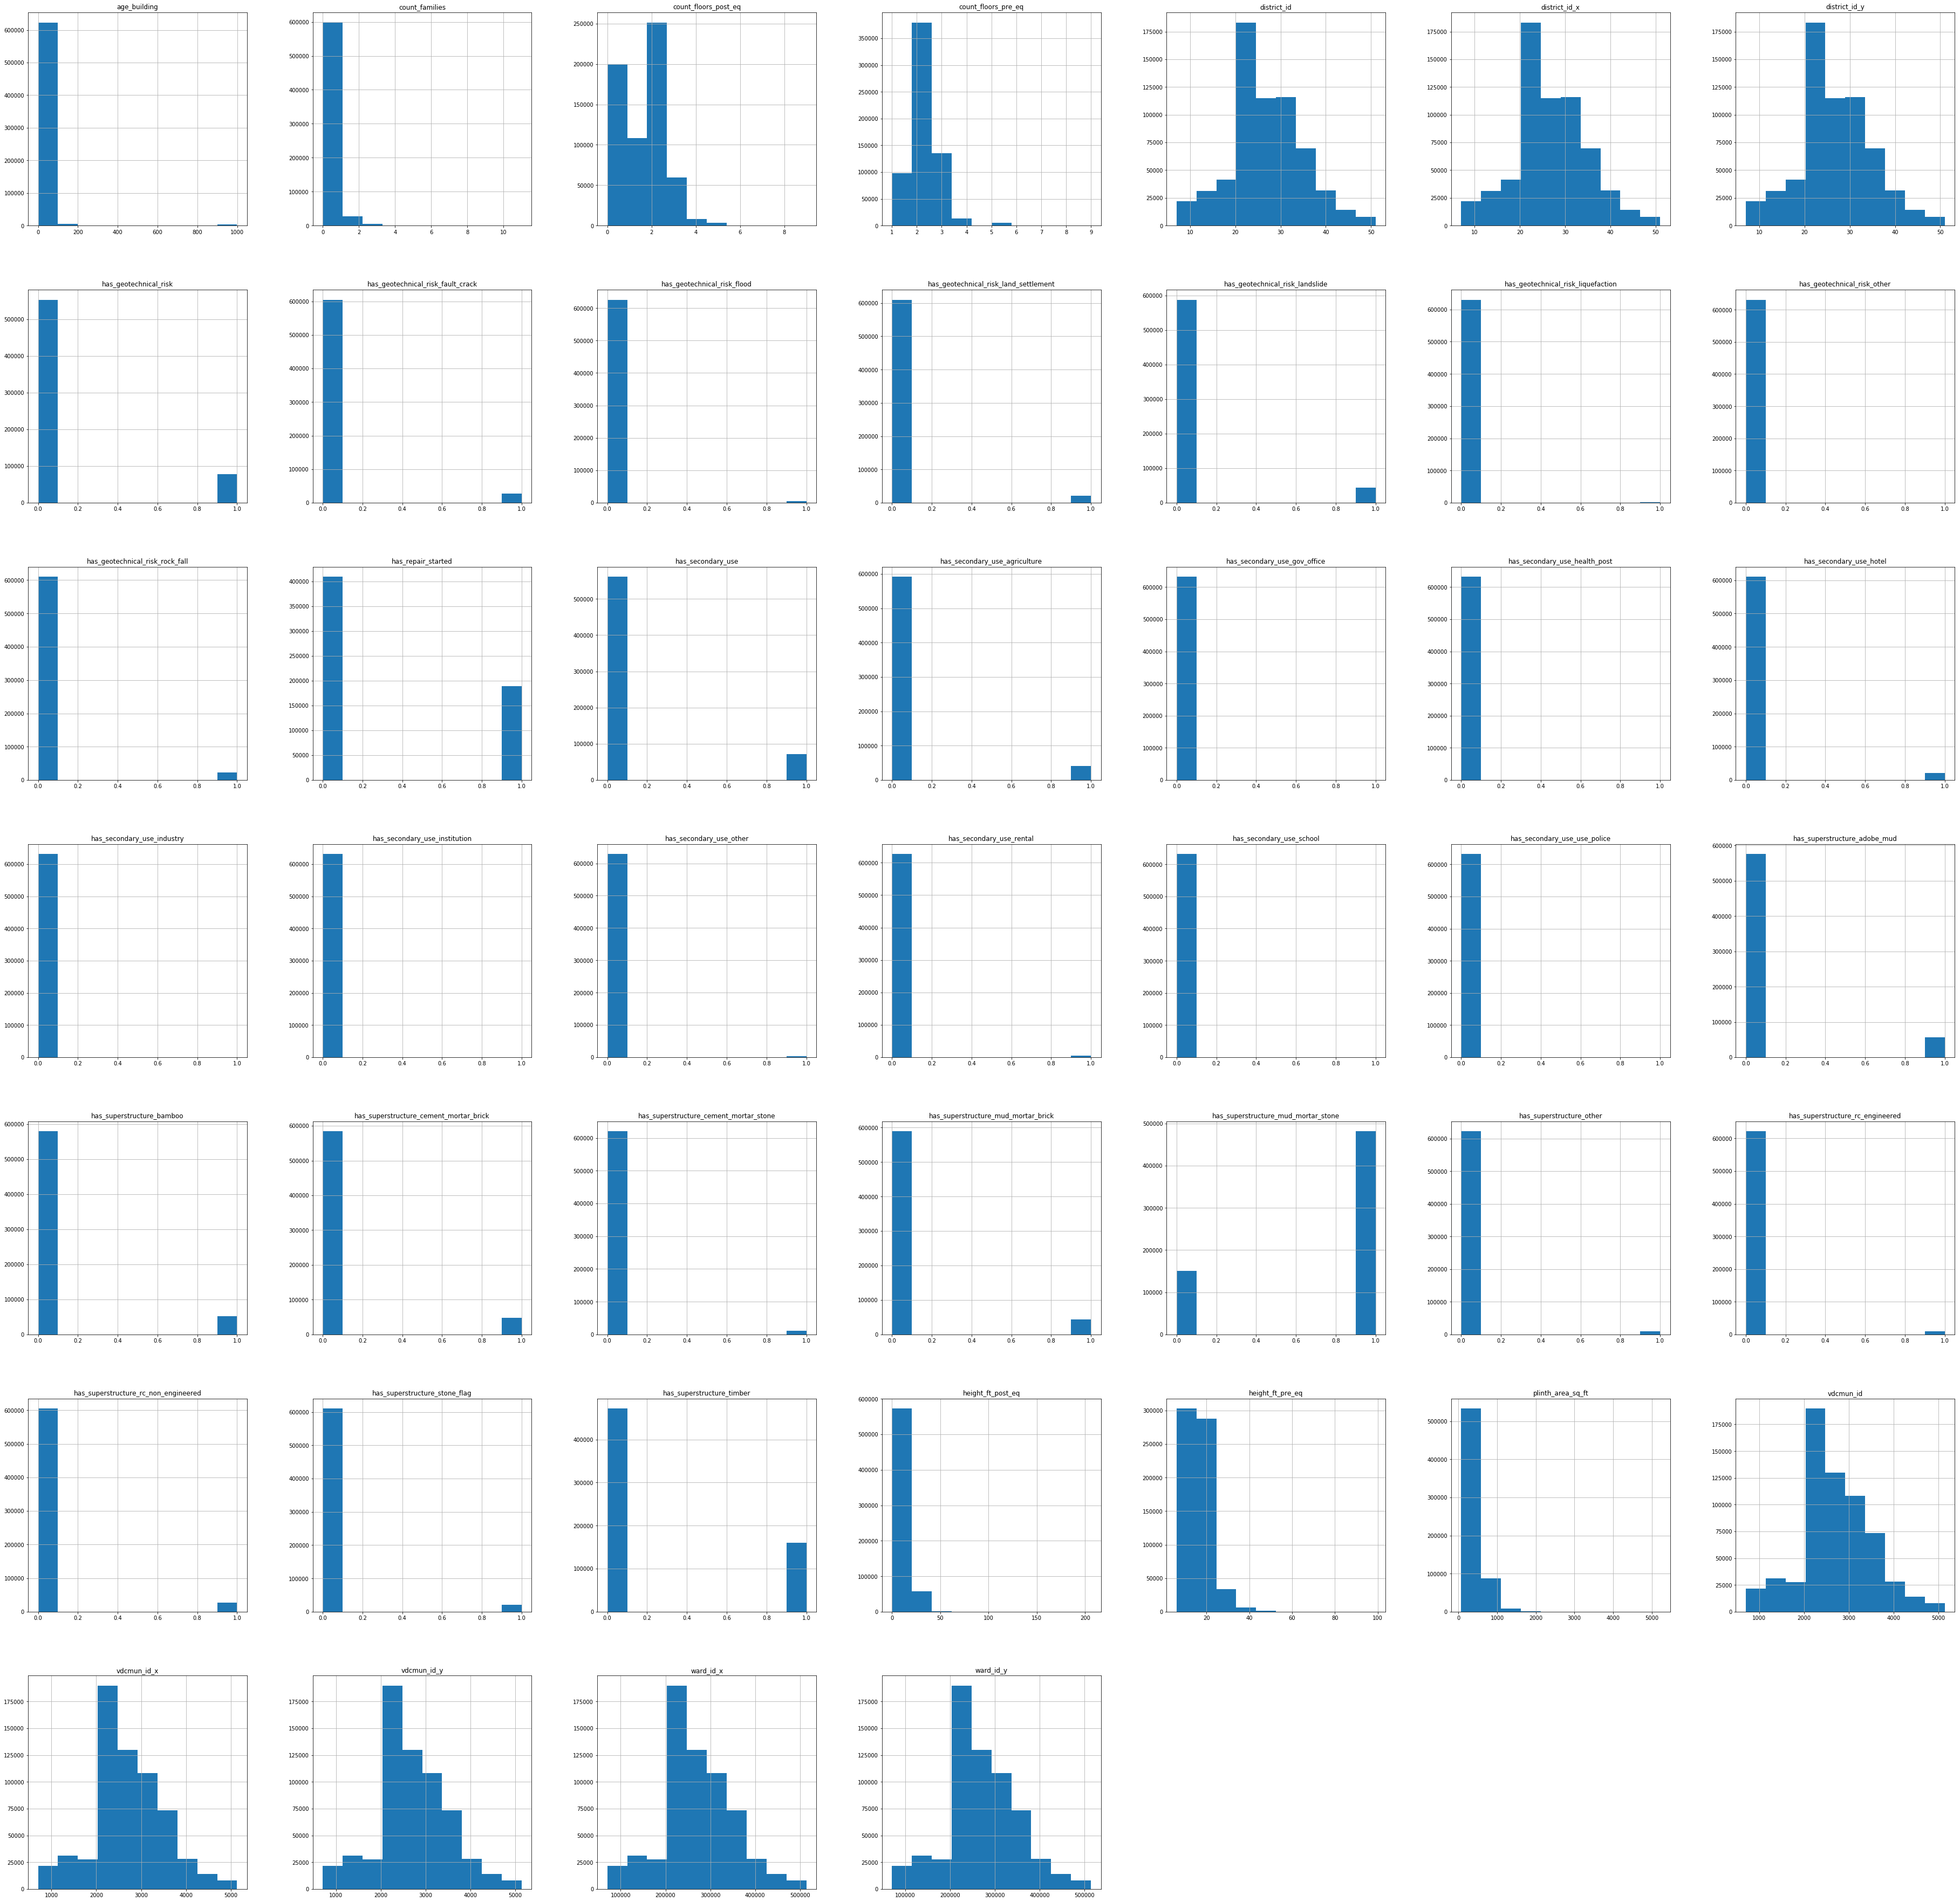

In [87]:
X[X.dtypes[(X.dtypes=="float64")|(X.dtypes=="int64")]
                        .index.values].hist(figsize=[64,64])

# Validation / Test Train Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Making

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train,y_train)
# Checking the model's accuracy
accuracy_score(y_val,log.predict(X_val))


ValueError: ignored